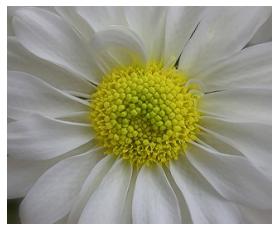

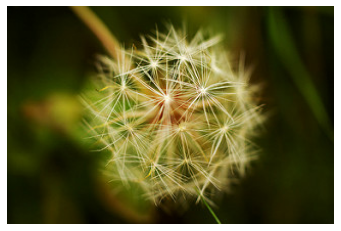

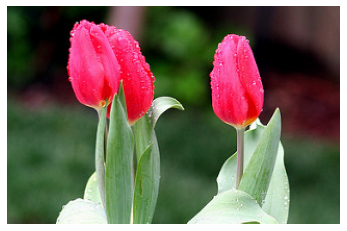

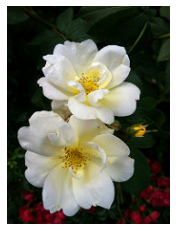

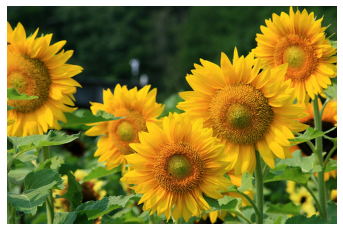

In [409]:
#1002040669
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_loc = 'D:/Work/MSCS/Courses/CSE 5334/Homework/Assignment-2-Image-Classifier/flowers' # location for images
classes = ['daisy','dandelion','tulip','rose','sunflower'] # categories of images
# read and store all images
for cls in classes:
    path = os.path.join(image_loc,cls)
    for img in os.listdir(path):
        image_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB))
        plt.show()
        break


In [410]:
print(image_arr.shape)

(330, 500, 3)


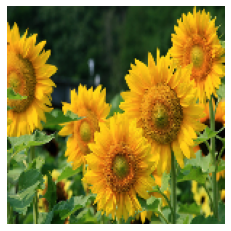

In [411]:
image_size = 150 # new dimension of images 
resized_image_arr = cv2.resize(image_arr,(image_size,image_size)) # resize all images to a fixed image_size
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image_arr, cv2.COLOR_BGR2RGB))
plt.show()

In [412]:
data = [] # list to contain all images with its correct label

# method to create a list of all resized images associated with their label's index
def create_train_data():
    for cls in classes:
        path = os.path.join(image_loc,cls)
        cls_num = classes.index(cls)
        for img in os.listdir(path):
            try:
                image_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
                resized_image_arr = cv2.resize(image_arr,(image_size,image_size))
                data.append([resized_image_arr,cls_num])
            except Exception as e:
                pass
create_train_data()

In [413]:
# total number of images
print(len(data))

4317


In [414]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   image_loc,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(180, 180),
#   batch_size=32)

In [415]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])

In [416]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   image_loc,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(180, 180),
#   batch_size=32)

In [417]:
# class_names = train_ds.class_names
# print(class_names)

In [418]:
for sample in data[:5]:
    print(sample[1])

0
0
0
0
0


In [419]:
# shuffle the images
import random
random.shuffle(data)

In [420]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [421]:
# normalization_layer = layers.Rescaling(1./255)

In [422]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image)) 

In [423]:
for sample in data[:5]:
    print(sample[1])

3
1
0
2
0


In [424]:
x_train = [] # to keep image array 
y_train = [] # to keep label array

In [426]:
# popuate x and y with image and label array
for feature, label in data:
    x_train.append(feature)
    y_train.append(label)
    
# convert x and y to numpy array
x_train = np.array(x_train).reshape(-1,image_size,image_size,3)
y_train = np.array(y_train)

In [427]:
# save x and y
import pickle
pickle_out = open('x.pickle','wb')
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [428]:
# load x
pickle_in = open('x.pickle','rb')
x_train = pickle.load(pickle_in)
x_train[1]

array([[[176, 214, 219],
        [177, 215, 220],
        [172, 210, 215],
        ...,
        [ 41, 126,  99],
        [ 46, 135, 104],
        [ 57, 150, 113]],

       [[177, 214, 222],
        [177, 215, 220],
        [173, 211, 216],
        ...,
        [ 39, 123,  96],
        [ 44, 131, 100],
        [ 56, 145, 110]],

       [[171, 210, 218],
        [173, 213, 218],
        [170, 210, 215],
        ...,
        [ 38, 119,  93],
        [ 43, 126,  96],
        [ 54, 140, 106]],

       ...,

       [[131, 176, 223],
        [104, 154, 204],
        [ 66, 120, 170],
        ...,
        [106, 151, 132],
        [116, 161, 143],
        [118, 166, 147]],

       [[141, 181, 222],
        [118, 164, 214],
        [ 82, 134, 189],
        ...,
        [122, 170, 151],
        [129, 178, 158],
        [123, 177, 154]],

       [[150, 189, 226],
        [129, 174, 224],
        [ 97, 150, 205],
        ...,
        [132, 183, 164],
        [135, 187, 166],
        [125, 180, 157]]

In [436]:
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

# load x and y
x_train = pickle.load(open('x.pickle','rb'))
y_train = pickle.load(open('y.pickle','rb'))

# x = x/255.0

# model = Sequential()
# model.add(Conv2D(32, (3,3), input_shape = x.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Flatten())
# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation('relu'))


# model.compile(loss = 'categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])

# model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

# train model
model = Sequential([
  layers.Rescaling(1./255, input_shape=(image_size, image_size, 3)), # CNN works only with 255 pixel for colored images, 3 denotes the images are colored having 3 dimensions RGB
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(128, 3, activation='relu'),
#   layers.MaxPooling2D(),
  layers.Flatten(), # converts 3D feature maps to 1D feature vectors
  layers.Dense(64, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [437]:
model.fit(x_train,y_train,batch_size = 16, epochs = 5, validation_split = 0.1)
# epochs=3
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

Epoch 1/3
243/243 [==============================] - 48s 196ms/step - loss: 1.6108 - accuracy: 0.4373 - val_loss: 1.3157 - val_accuracy: 0.4444
Epoch 2/3
243/243 [==============================] - 48s 197ms/step - loss: 1.0419 - accuracy: 0.5925 - val_loss: 1.1246 - val_accuracy: 0.5347
Epoch 3/3
243/243 [==============================] - 48s 197ms/step - loss: 0.8102 - accuracy: 0.7084 - val_loss: 1.0725 - val_accuracy: 0.5556
